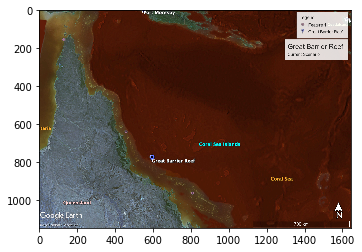

(1148, 1644, 3)


In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: Feel free to try out your own images here by changing img_path
# to a file path to another image on your computer!
img_path = 'old.png'
#img_path = "bottle_data/test/bottle_81.jpg"
#img_path = "a.jpg"

# load color image 
bgr_img = cv2.imread(img_path)
# convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# normalize, rescale entries to lie in [0,1]
gray_img = gray_img.astype("float32")/255

# plot image
plt.imshow(bgr_img, cmap='gray')
plt.show()

print(bgr_img.shape)

In [31]:
import numpy as np

filter_vals = np.array([[-6, 0, 6], [-8, 0, 8], [-6, 0, 6]])

print('Filter shape: ', filter_vals.shape)

Filter shape:  (3, 3)


In [32]:
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

print('Filter 1: \n', filter_1)

Filter 1: 
 [[-6  0  6]
 [-8  0  8]
 [-6  0  6]]


In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
    
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        k_height, k_width = weight.shape[2:]
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)

    def forward(self, x):
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        return conv_x, activated_x
    
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), bias=False)
)


In [34]:
def viz_layer(layer, n_filters= 4):
    l = []
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        l.append(layer[0,i].data.numpy())
        
    return l

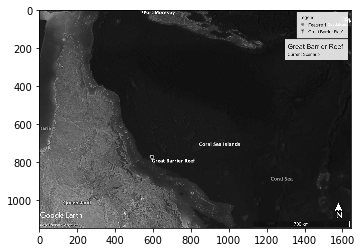

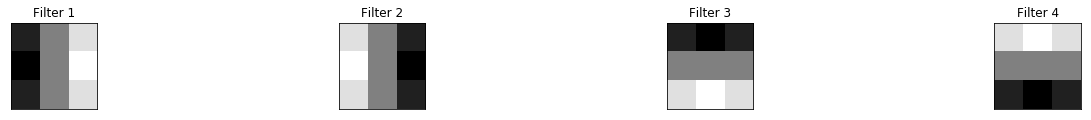

In [35]:
plt.imshow(gray_img, cmap='gray')

fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

conv_layer, activated_layer = model(gray_img_tensor)

(1146, 1642)


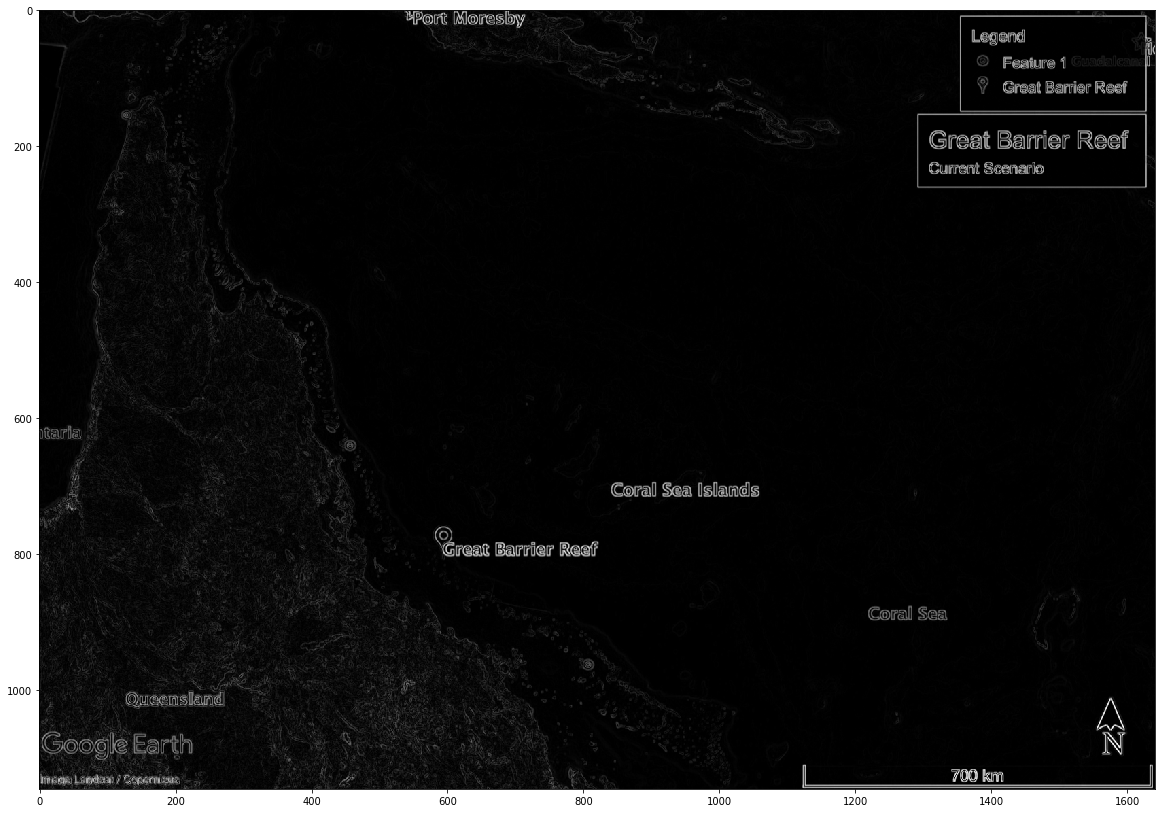

In [36]:
l = viz_layer(activated_layer)
left = l[0]
top = l[2]
right = l[1]
bottom = l[3]

x = np.add(left,top)
y = np.add(x,right)
z = np.add(y,bottom)

w = np.divide(z, 4)

#median = cv2.medianBlur(w,5)
#blur = cv2.bilateralFilter(w,9,75,75)
#blur = cv2.GaussianBlur(w,(5,5),0)

plt.imshow(w, cmap="gray")
print(z.shape)

# Analysis for Old image

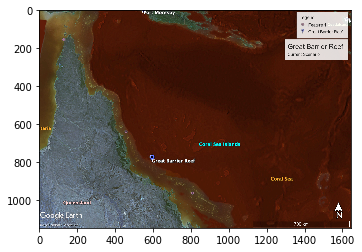

In [323]:
import cv2

old_img = cv2.imread("old.png")

plt.imshow(old_img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


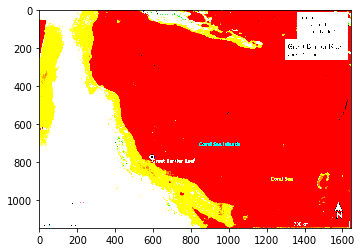

(1148, 1644, 3)


In [324]:
import numpy as np

# Converting image to red region
old_img = np.divide(old_img, 6)
old_img = np.subtract(old_img, 6)

plt.imshow(old_img)
plt.show()

print(old_img.shape)

In [325]:
# Find max pixel value in red region
m = 0
for rgb in old_img:
    n_m = max(rgb[0])
    if n_m > m:
        m = n_m
print("Max pixel value in red region: ", m)

# Find min pixel value
m = 999
for rgb in old_img:
    n_m = min(rgb[0])
    if n_m < m:
        m = n_m
print("Min pixel value in red region: ", m)

Max pixel value in red region:  35.333333333333336
Min pixel value in red region:  -5.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


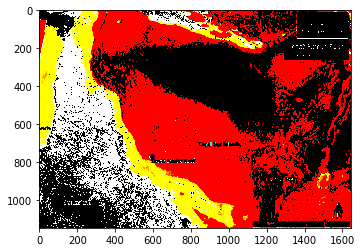

In [326]:
# To find min and max using trial and error
min_value = 5
max_value = 13

#zeros = [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]

for i in range(old_img.shape[0]):
    for j in range(old_img.shape[1]):
        m = max(old_img[i][j])
        if m > min_value and m < max_value:
            pass
        else:
            old_img[i][j][0] = 0
            old_img[i][j][1] = 0
            old_img[i][j][2] = 0
    
plt.imshow(old_img)
plt.show()

In [327]:
# Find max pixel value in green region
m = 0
for rgb in old_img:
    n_m = max(rgb[1])
    if n_m > m:
        m = n_m
print("Max pixel value in green region: ", m)

# Find min pixel value
m = 999
for rgb in old_img:
    n_m = min(rgb[1])
    if n_m < m:
        m = n_m
print("Min pixel value in green region: ", m)

Max pixel value in green region:  12.833333333333332
Min pixel value in green region:  -4.833333333333333


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


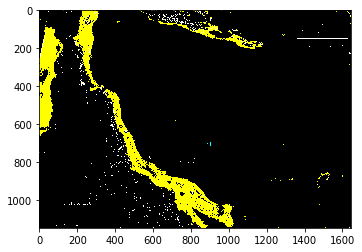

In [328]:
# To find min and max using trial and error
min_value = 1
max_value = 6

#zeros = [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]

for i in range(old_img.shape[0]):
    for j in range(old_img.shape[1]):
        m = old_img[i][j][1]
        if m > min_value and m < max_value:
            pass
        else:
            old_img[i][j][0] = 0
            old_img[i][j][1] = 0
            old_img[i][j][2] = 0
    
plt.imshow(old_img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


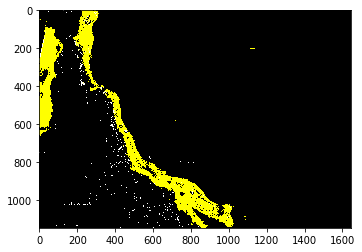

In [329]:
for i in range(old_img.shape[0]):
    for j in range(old_img.shape[1]):
        if i > 0 and i < 200 and j > 400:
            old_img[i][j][0] = 0
            old_img[i][j][1] = 0
            old_img[i][j][2] = 0
        elif i > 600 and i < 800 and j > 800:
            old_img[i][j][0] = 0
            old_img[i][j][1] = 0
            old_img[i][j][2] = 0
        elif j > 1200:
            old_img[i][j][0] = 0
            old_img[i][j][1] = 0
            old_img[i][j][2] = 0
        else:
            pass
            
plt.imshow(old_img)
plt.show()

# Analysis for New image

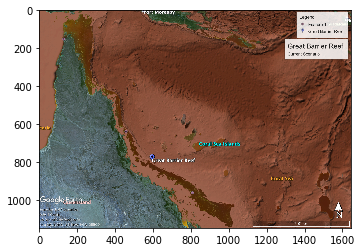

In [284]:
new_img = cv2.imread("new.png")

plt.imshow(new_img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


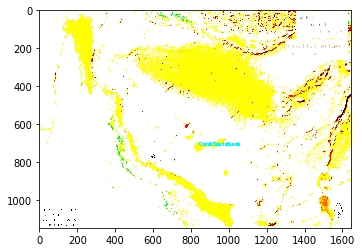

(1148, 1644, 3)


In [285]:
# Converting image to red region
new_img = np.divide(new_img, 5)
new_img = np.subtract(new_img, 6)

plt.imshow(new_img)
plt.show()

print(new_img.shape)

In [286]:
# Find max pixel value in red region
m = 0
for rgb in new_img:
    n_m = max(rgb[0])
    if n_m > m:
        m = n_m
print("Max pixel value in red region: ", m)

# Find min pixel value
m = 999
for rgb in new_img:
    n_m = min(rgb[0])
    if n_m < m:
        m = n_m
print("Min pixel value in red region: ", m)

Max pixel value in red region:  44.6
Min pixel value in red region:  -3.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


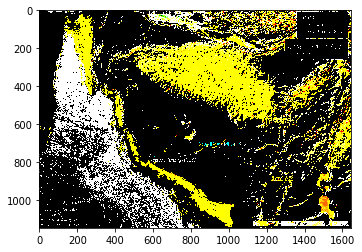

In [287]:
# To find min and max using trial and error
min_value = 5
max_value = 15

#zeros = [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]

for i in range(new_img.shape[0]):
    for j in range(new_img.shape[1]):
        m = max(new_img[i][j])
        if m > min_value and m < max_value:
            pass
        else:
            new_img[i][j][0] = 0
            new_img[i][j][1] = 0
            new_img[i][j][2] = 0
    
plt.imshow(new_img)
plt.show()

In [288]:
# Find max pixel value in green region
m = 0
for rgb in new_img:
    n_m = max(rgb[1])
    if n_m > m:
        m = n_m
print("Max pixel value in green region: ", m)

# Find min pixel value
m = 999
for rgb in new_img:
    n_m = min(rgb[1])
    if n_m < m:
        m = n_m
print("Min pixel value in green region: ", m)

Max pixel value in green region:  14.8
Min pixel value in green region:  -0.40000000000000036


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


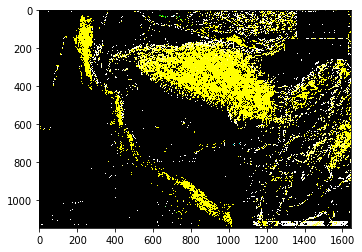

In [289]:
# To find min and max using trial and error
min_value = 2
max_value = 6

#zeros = [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]

for i in range(new_img.shape[0]):
    for j in range(new_img.shape[1]):
        m = new_img[i][j][1]
        if m > min_value and m < max_value:
            pass
        else:
            new_img[i][j][0] = 0
            new_img[i][j][1] = 0
            new_img[i][j][2] = 0
    
plt.imshow(new_img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


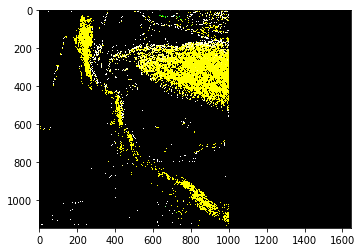

In [290]:
for i in range(new_img.shape[0]):
    for j in range(new_img.shape[1]):
        if j > 1000:
            new_img[i][j][0] = 0
            new_img[i][j][1] = 0
            new_img[i][j][2] = 0
        else:
            pass
        
plt.imshow(new_img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


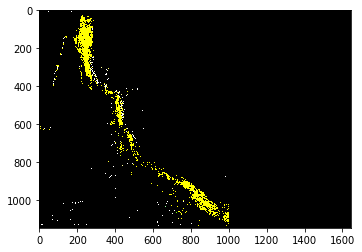

In [291]:
for i in range(new_img.shape[0]):
    for j in range(new_img.shape[1]):
        if i > 0 and i < 300 and j > 290:
            new_img[i][j][0] = 0
            new_img[i][j][1] = 0
            new_img[i][j][2] = 0
        elif i > 300 and i < 410 and j > 370:
            new_img[i][j][0] = 0
            new_img[i][j][1] = 0
            new_img[i][j][2] = 0
        elif i > 300 and i < 800 and j > 550:
            new_img[i][j][0] = 0
            new_img[i][j][1] = 0
            new_img[i][j][2] = 0
        else:
            pass
        
plt.imshow(new_img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


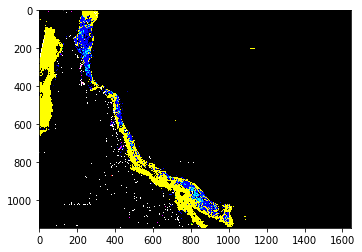

In [342]:
final_img = old_img - new_img

plt.imshow(final_img)
plt.show()

# New Images

# Old

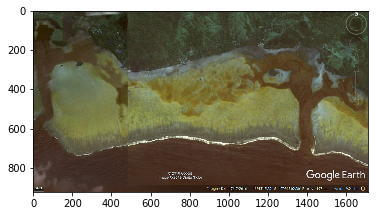

In [106]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


old_img = cv2.imread("4.png")
extra_img = cv2.imread("4.png")

plt.imshow(old_img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


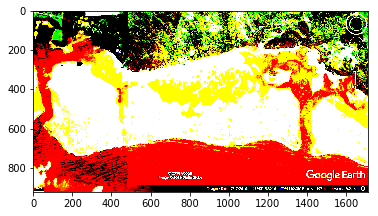

(924, 1712, 3)


In [107]:
import numpy as np

# Converting image to red region
old_img = np.divide(old_img, 6)
old_img = np.subtract(old_img, 10)

extra_img = np.divide(extra_img, 6)
extra_img = np.subtract(extra_img, 10)

plt.imshow(old_img)
plt.show()

print(old_img.shape)

In [108]:
# Find max pixel value in red region
m = 0
for rgb in old_img:
    n_m = max(rgb[0])
    if n_m > m:
        m = n_m
print("Max pixel value in red region: ", m)

# Find min pixel value
m = 999
for rgb in old_img:
    n_m = min(rgb[0])
    if n_m < m:
        m = n_m
print("Min pixel value in red region: ", m)

Max pixel value in red region:  25.166666666666664
Min pixel value in red region:  -9.166666666666666


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


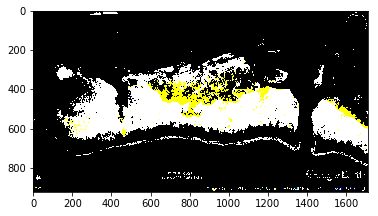

In [109]:
# To find min and max using trial and error
min_value = 10
max_value = 25

#zeros = [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]

for i in range(old_img.shape[0]):
    for j in range(old_img.shape[1]):
        m = max(old_img[i][j])
        if m > min_value and m < max_value:
            pass
        else:
            old_img[i][j][0] = 0
            old_img[i][j][1] = 0
            old_img[i][j][2] = 0
            
for i in range(extra_img.shape[0]):
    for j in range(extra_img.shape[1]):
        m = max(extra_img[i][j])
        if m > min_value and m < max_value:
            pass
        else:
            extra_img[i][j][0] = 0
            extra_img[i][j][1] = 0
            extra_img[i][j][2] = 0
    
plt.imshow(old_img)
plt.show()

In [110]:
# Find max pixel value in green region
m = 0
for rgb in old_img:
    n_m = max(rgb[1])
    if n_m > m:
        m = n_m
print("Max pixel value in green region: ", m)

# Find min pixel value
m = 999
for rgb in old_img:
    n_m = min(rgb[1])
    if n_m < m:
        m = n_m
print("Min pixel value in green region: ", m)

Max pixel value in green region:  21.0
Min pixel value in green region:  0.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


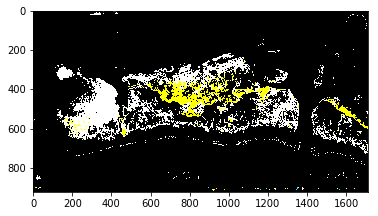

In [111]:
# To find min and max using trial and error
min_value = 3
max_value = 13

#zeros = [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]

for i in range(old_img.shape[0]):
    for j in range(old_img.shape[1]):
        m = old_img[i][j][1]
        if m > min_value and m < max_value:
            pass
        else:
            old_img[i][j][0] = 0
            old_img[i][j][1] = 0
            old_img[i][j][2] = 0
    
plt.imshow(old_img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


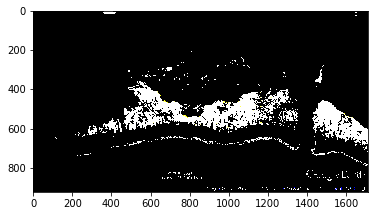

In [112]:
final_img = extra_img - old_img
   
plt.imshow(final_img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


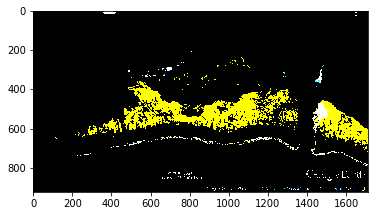

In [287]:
final_img = np.subtract(final_img, 10)

plt.imshow(final_img)
plt.show()

# New

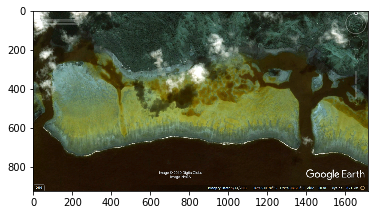

In [297]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


new_img = cv2.imread("3.png")
extra_img = cv2.imread("3.png")

plt.imshow(new_img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


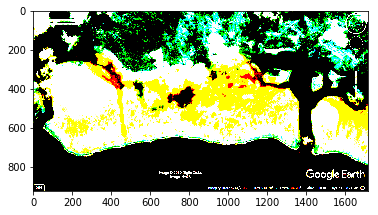

(924, 1716, 3)


In [298]:
import numpy as np

# Converting image to red region
new_img = np.divide(new_img, 6)
new_img = np.subtract(new_img, 10)

extra_img = np.divide(extra_img, 6)
extra_img = np.subtract(extra_img, 10)

plt.imshow(new_img)
plt.show()

print(new_img.shape)

In [299]:
# Find max pixel value in red region
m = 0
for rgb in new_img:
    n_m = max(rgb[0])
    if n_m > m:
        m = n_m
print("Max pixel value in red region: ", m)

# Find min pixel value
m = 999
for rgb in new_img:
    n_m = min(rgb[0])
    if n_m < m:
        m = n_m
print("Min pixel value in red region: ", m)

Max pixel value in red region:  32.5
Min pixel value in red region:  -10.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


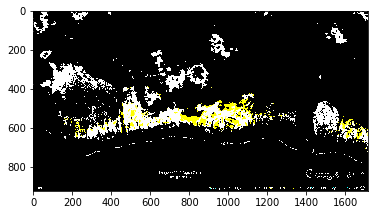

In [300]:
# To find min and max using trial and error
min_value = 14
max_value = 28

#zeros = [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]

for i in range(new_img.shape[0]):
    for j in range(new_img.shape[1]):
        m = max(new_img[i][j])
        if m > min_value and m < max_value:
            pass
        else:
            new_img[i][j][0] = 0
            new_img[i][j][1] = 0
            new_img[i][j][2] = 0
            
for i in range(extra_img.shape[0]):
    for j in range(extra_img.shape[1]):
        m = max(extra_img[i][j])
        if m > min_value and m < max_value:
            pass
        else:
            extra_img[i][j][0] = 0
            extra_img[i][j][1] = 0
            extra_img[i][j][2] = 0
    
plt.imshow(new_img)
plt.show()

In [301]:
# Find max pixel value in green region
m = 0
for rgb in new_img:
    n_m = max(rgb[1])
    if n_m > m:
        m = n_m
print("Max pixel value in green region: ", m)

# Find min pixel value
m = 999
for rgb in new_img:
    n_m = min(rgb[1])
    if n_m < m:
        m = n_m
print("Min pixel value in green region: ", m)

Max pixel value in green region:  27.5
Min pixel value in green region:  0.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


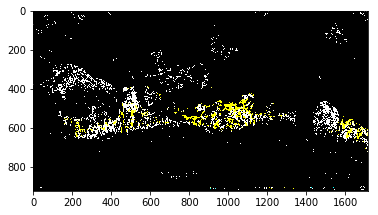

In [302]:
# To find min and max using trial and error
min_value = 3
max_value = 16

#zeros = [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]

for i in range(new_img.shape[0]):
    for j in range(new_img.shape[1]):
        m = new_img[i][j][1]
        if m > min_value and m < max_value:
            pass
        else:
            new_img[i][j][0] = 0
            new_img[i][j][1] = 0
            new_img[i][j][2] = 0
    
plt.imshow(new_img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


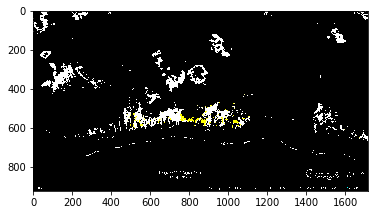

In [303]:
new_final = extra_img - new_img

plt.imshow(new_final)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


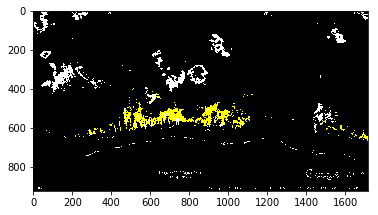

In [304]:
new_final = np.subtract(new_final, 5)

plt.imshow(new_final)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


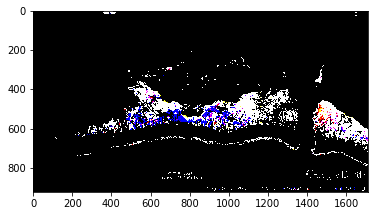

In [285]:
new_new = []

for i in new_final:
    count = 0
    l = []
    for j in i:
        if count < 1712:
            l.append(j)
        count += 1
    new_new.append(l)

final = final_img - new_new

plt.imshow(final)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


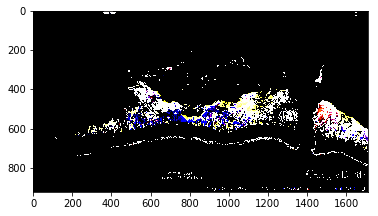

In [286]:
final = np.divide(final,3)

plt.imshow(final)
plt.show()